In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt



In [2]:
# Load XRD data from Excel
df = pd.read_excel(r'C:\Users\judit\OneDrive - Imperial College London\MSE Yr2\Lab\MATE50005 XRD lab\MATE50005_DiffractionLab_data.xlsx', sheet_name='MATE50005_DiffractionLab_data(1')

df

,2theta,Intensity
0,30.00,8.272393
1,30.02,8.393215
2,30.04,7.454397
3,30.06,8.562399
4,30.08,7.837305
...,...,...
5996,149.92,47.298873
5997,149.94,48.092962
5998,149.96,51.655273
5999,149.98,52.197982


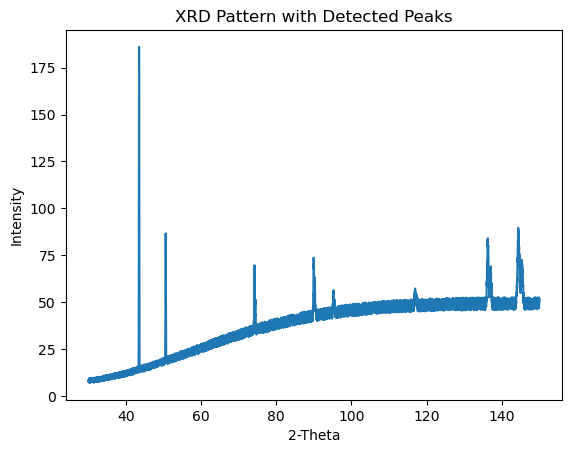

In [4]:
theta = df['2theta']
intensity = df['Intensity']

# Find peaks

# Plot XRD pattern with peaks
plt.plot(theta, intensity)
plt.title('XRD Pattern with Detected Peaks')
plt.xlabel('2-Theta')
plt.ylabel('Intensity')
plt.show()



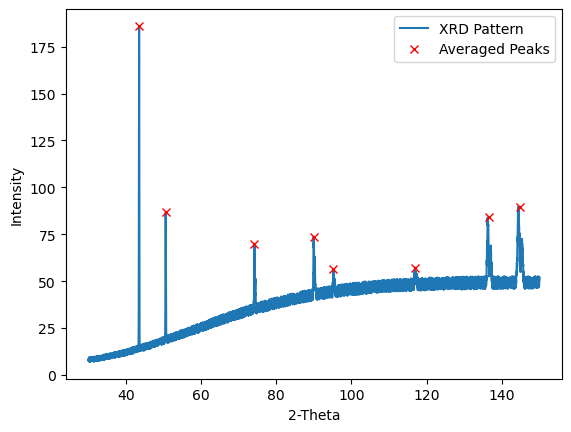

Averaged Peak 1: 2-Theta = 43.48, Max Intensity = 186.0307666
Averaged Peak 2: 2-Theta = 50.54, Max Intensity = 86.61027659
Averaged Peak 3: 2-Theta = 74.18, Max Intensity = 69.6544094
Averaged Peak 4: 2-Theta = 90.04, Max Intensity = 73.70365957
Averaged Peak 5: 2-Theta = 95.18, Max Intensity = 56.40125306
Averaged Peak 6: 2-Theta = 116.92, Max Intensity = 57.25785632
Averaged Peak 7: 2-Theta = 136.72, Max Intensity = 84.02181773
Averaged Peak 8: 2-Theta = 144.88, Max Intensity = 89.61549553


In [16]:
peaks, properties = find_peaks(intensity, height=55) 
grouped_peaks = []
current_group = [peaks[0]]

for i in range(1, len(peaks)):
    if theta[peaks[i]] - theta[peaks[i-1]] < 1:
        current_group.append(peaks[i])
    else:
        if current_group:
            grouped_peaks.append(current_group)
        current_group = [peaks[i]]

if current_group:
    grouped_peaks.append(current_group)

# Calculate mean of 2-theta values for each group
mean_peaks_theta = [np.mean(theta[group]) for group in grouped_peaks]

# Find the maximum intensity for each group
max_intensities = [max(intensity[group]) for group in grouped_peaks]

# Find closest index in theta for each averaged peak
mean_peaks_indices = [np.abs(theta - mean_theta).argmin() for mean_theta in mean_peaks_theta]

# Plot XRD pattern with original and averaged peaks
plt.plot(theta, intensity, label='XRD Pattern')
#plt.plot(theta[peaks], intensity[peaks], "x", label='Original Peaks')
plt.plot(theta[mean_peaks_indices], max_intensities, "rx", label='Averaged Peaks')
plt.xlabel('2-Theta')
plt.ylabel('Intensity')
plt.legend()
plt.savefig(r'C:\Users\judit\OneDrive - Imperial College London\MSE Yr2\Lab\MATE50005 XRD lab/XRD_peaks.png')  # Specify your path and file name here
plt.show()

# Print averaged peak details
for i, (peak_idx, max_intensity) in enumerate(zip(mean_peaks_indices, max_intensities)):
    print(f"Averaged Peak {i+1}: 2-Theta = {theta[peak_idx]}, Max Intensity = {max_intensity}")

In [15]:
plt.savefig(r'C:\Users\judit\OneDrive - Imperial College London\MSE Yr2\Lab\MATE50005 XRD lab/XRD_peaks.png')  # Specify your path and file name here

<Figure size 640x480 with 0 Axes>